In [ ]:
# Start writing code here...
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import scipy

#https://github.com/alitapan/comp-551/blob/master/Assignment1/logistic_regression/logistic_regression.ipynb 



In [ ]:
# SKLEARN DATASET - DIGITS
from sklearn.datasets import load_digits
digits = load_digits()

#digits.images = images
#digits.target = target 

# ONE OPENML DATASET
from sklearn.datasets import fetch_openml
mice = fetch_openml(name='miceprotein', version=4)


In [ ]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds
    
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad


In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))

def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

def cost(output, y_target):
    return np.mean(cross_entropy(output, y_target))

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

def gradient(self, x, y, w):
    N,D = x.shape
    yh = softmax(np.dot(x, w))    # predictions  size N
    print("yh", yh)
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad

def J_cost(self, x, y, w):
    N,D = x.shape
    yh = softmax(np.dot(x, w))    # predictions  size N
    J_cost = cost(yh, y)
    return J_cost 
    

class GradientDescent:
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            print(grad)
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w,t,grad
    


class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self,x, y,optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        w0 = np.zeros([D, 10])
        #self.b_ -= (self.eta * np.sum(diff, axis=0))
        #w0 = np.random.randn(D,10) * 0.001
        
        #self.w = optimizer.run(gradient, x, y)    
        #g = np.inf 
        #t = 0
        # the code snippet below is for gradient descent
        self.w,t,g = optimizer.run(self.gradient, x, y, w0) 
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

    def multiclass_predict(self,x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        prediction=softmax(np.dot(x,self.w))
        #print("x", x.shape)
        #print("w", self.w.shape)
        #print("prediction", prediction.shape)
        predict_arr=[]

        for i in prediction:
            predict_arr.append(np.argmax(i))

        return predict_arr

    

#LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function
LogisticRegression.gradient = J_cost

2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.302585092994046
2.30258509

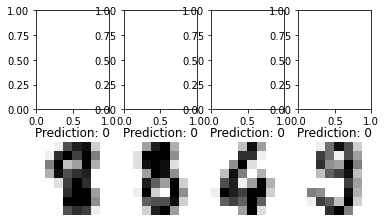

In [ ]:
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))

enc = OneHotEncoder()
y_enc = oneHotIt(digits.target)
y = digits.target
#print(y_enc)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_enc, test_size=0.5, random_state=0)

model = LogisticRegression(verbose=True)
optimizer = GradientDescent(learning_rate=.01, max_iters=100, record_history=True)
predicted = model.fit(x_train, y_train, optimizer).multiclass_predict(x_test)

_, axes = plt.subplots(2, 4)
print(predicted)


images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1,:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)


In [ ]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
# https://medium.com/@awjuliani/simple-softmax-in-python-tutorial-d6b4c4ed5c16


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference


n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=0)

logistic = lambda z: 1./ (1 + np.exp(-z))
model = LogisticRegression(verbose=True, )
optimizer = GradientDescent(learning_rate=.01, max_iters=1000, record_history=True)
predicted = model.fit(x_train, y_train, optimizer).predict(x_test)


_, axes = plt.subplots(2, 4)
print(predicted)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1,:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
